In [53]:
import pandas as pd
import matplotlib.pyplot as plt

renamer = {
    'Age1': 'Group',
    'Year1': 'Year',
    'Number of People At Possible Risk for Psychotic-Like Episodes': 'Psychotic Episodes',
    'Number of People Identifying as Trauma Survivors': 'Trauma Survivors',
    'Number of People Reporting Frequent Suicidal Ideation': 'Suicidal Ideation',
    'Number of People Scoring Positive for PTSD': 'PTSD',
    'Number of People Scoring with Severe Depression': 'Severe Depression'
}

to_keep = ['State', 'Group', 'Year',
           'Psychotic Episodes', 'Trauma Survivors',
           'Suicidal Ideation', 'PTSD',
           'Severe Depression', 'Total Population']

mh2020 = pd.read_csv('data/full_mh_2020.csv')
mh2020 = mh2020.rename(renamer, axis=1)
mh2020 = mh2020[(to_keep)]

mh2021 = pd.read_csv('data/full_mh_2021.csv')
mh2021 = mh2021.rename(renamer, axis=1)
mh2021 = mh2021[(to_keep)]

mh2022 = pd.read_csv('data/full_mh_2022.csv')
mh2022 = mh2022.rename(renamer, axis=1)
mh2022 = mh2022[(to_keep)]

mh2023 = pd.read_csv('data/full_mh_2023.csv')
mh2023 = mh2023.rename(renamer, axis=1)
mh2023 = mh2023[(to_keep)]

combined_20_23 = pd.concat([mh2020, mh2021], axis=0)
combined_20_23 = pd.concat([combined_20_23, mh2022], axis=0)
combined_20_23 = pd.concat([combined_20_23, mh2023], axis=0)
combined_20_23

,State,Group,Year,Psychotic Episodes,Trauma Survivors,Suicidal Ideation,PTSD,Severe Depression,Total Population
0,Alabama,All Ages,2020,29.088011,53.235426,45.338408,13.730494,41.945468,5039877
1,Alaska,All Ages,2020,49.544613,98.133820,83.120301,25.386496,70.836512,732673
2,Arizona,All Ages,2020,25.411211,54.244483,47.331644,13.482097,43.895840,7276316
3,Arkansas,All Ages,2020,26.768975,58.197734,40.087366,18.275609,39.029826,3025891
4,California,All Ages,2020,18.698789,42.030860,41.340200,10.408321,37.298183,39237836
...,...,...,...,...,...,...,...,...,...
46,Virginia,All Ages,2023,18.298822,78.941741,41.284630,16.133826,37.507403,8683619
47,Washington,All Ages,2023,21.783286,105.602697,45.017934,18.636526,39.713396,7785786
48,West Virginia,All Ages,2023,26.983544,97.399890,40.954147,23.716226,40.672482,1775156
49,Wisconsin,All Ages,2023,19.668941,86.431333,40.016706,15.680847,35.264934,5892539


In [22]:
import pandas as pd
import numpy as np


df_2024=pd.read_csv('https://www.aclu.org/wp-json/api/legislation/csv/74348')

df_2023=pd.read_csv('https://www.aclu.org/wp-json/api/legislation/csv/67497')
df_2022=pd.read_csv('https://www.aclu.org/wp-content/uploads/2024/01/legislation-tracker_2022.csv')
df_2021 = pd.read_csv('https://www.aclu.org/wp-content/uploads/2024/01/2021-legislation-tracker_2021.csv')
df_2020 = pd.read_csv('https://www.aclu.org/wp-content/uploads/2024/01/legislation-tracker_2020.csv')

aff_comp_protection = pd.read_csv(r'wrangling work/aff_compprotection', sep = '\t', header = None)
aff_health_care = pd.read_csv(r'wrangling work/aff_health_care', sep = '\t', header = None)
aff_ID_docs = pd.read_csv(r'wrangling work/aff_ID_docs', sep = '\t', header = None)
aff_incomplete_protection = pd.read_csv(r'wrangling work/aff_incomplete_2018', sep = '\t', header = None)
aff_other = pd.read_csv(r'wrangling work/aff_other', sep = '\t', header = None)

anti_adoption = pd.read_csv(r'wrangling work/anti_adoption', sep = '\t', header = None)


anti_FADA_and_religious_exemption=  pd.read_csv(r'wrangling work/anti_FADA_and_religious_exemption', sep = '\t', header = None)
anti_first_amend_def =  pd.read_csv(r'wrangling work/anti_first_amend_def', sep = '\t', header = None)

anti_health_care = pd.read_csv(r'wrangling work/anti_health_care', sep = '\t', header = None)

anti_marriage_rel_exemption =  pd.read_csv(r'wrangling work/anti_marriage_rel_exemption', sep = '\t', header = None)

anti_preempt_local_protection =  pd.read_csv(r'wrangling work/anti_preempt_local_protection', sep = '\t', header = None)

anti_religious_exemption_RFRA =  pd.read_csv(r'wrangling work/anti_religious_exemption_RFRA', sep = '\t', header = None)

anti_school_and_student_org =  pd.read_csv(r'wrangling work/anti_school_and_student_org', sep = '\t', header = None)

anti_single_sex_restrooms = pd.read_csv(r'wrangling work/anti_single_sex_restrooms', sep = '\t', header = None)

other_anti_lgbt = pd.read_csv(r'wrangling work/other_anti_lgbt', sep = '\t', header = None)

other_anti_trans =  pd.read_csv(r'wrangling work/other_anti_trans', sep = '\t', header = None)

other_rel_exemption = pd.read_csv(r'wrangling work/other_rel_exemption', sep = '\t', header = None)
#reading csv from text files that have pre 2020 data

def make_df(tdf, which_type):
    ind = 0
    state=[]
    number = []
    status = []
    for each in tdf[0]:
        if ind % 3 == 0:
            state.append(each)
        elif ind % 3 == 1:
            number.append(each)
        else:
            status.append(each)
        ind += 1
    
    new_df = pd.DataFrame()

    new_df['State'] = state
    new_df['number'] = number
    new_df['status'] = status

    
    dates = []
    statuses = []
    for status in new_df['status']:
        parts = status.split(': ')
        if len(parts) > 1:
            dates.append(parts[0])
            statuses.append(': '.join(parts[1:]))
        else:
            dates.append('')
            statuses.append(parts[0])

    new_df['Date'] = dates
    new_df['status'] = statuses
    new_df = new_df.assign(dtype = which_type)
    
    new_df = new_df.drop(0)

    return new_df
df_list = [aff_comp_protection, aff_health_care, aff_ID_docs, aff_incomplete_protection, aff_other, anti_adoption, 
            anti_FADA_and_religious_exemption, anti_first_amend_def, anti_health_care, anti_marriage_rel_exemption,
            anti_preempt_local_protection, anti_religious_exemption_RFRA, anti_school_and_student_org,
            anti_single_sex_restrooms, other_anti_lgbt, other_anti_trans, other_rel_exemption]
df_names = ['aff_comp_protection', 'aff_health_care', 'aff_ID_docs', 'aff_incomplete_protection', 'aff_other', 'anti_adoption', 
            'anti_FADA_and_religious_exemption', 'anti_first_amend_def', 'anti_health_care', 'anti_marriage_rel_exemption',
            'anti_preempt_local_protection', 'anti_religious_exemption_RFRA', 'anti_school_and_student_org',
            'anti_single_sex_restrooms', 'other_anti_lgbt', 'other_anti_trans', 'other_rel_exemption']
for each, name in zip(df_list, df_names):
    
    try:
        each = make_df(each, name)
        
    except:
        print(name)
        
#identifies which ones are messed up 

dfs = {}

# Loop through each element in the list
for each, name in zip(df_list, df_names):
    # Generate DataFrame for the current element
    new_df = make_df(each, name)
    
    # Store the DataFrame in the dictionary with element as key
    dfs[name] = new_df
    
combined_df = pd.concat(dfs.values(), ignore_index=True)

combined_df = combined_df[combined_df['State'] != 'State'] #remove invalid rows
#this is the combined df of all the ones we had to pull from text data. Further cleaning will involve combining all
status_index = df_2022.columns.get_loc('Status ')

# Insert the 'Status Detail' column right after the 'Status' column
df_2022.insert(status_index + 1, 'Status Detail', np.nan)
website_csv= [df_2024, df_2022, df_2023, df_2021, df_2020]
for each in website_csv:
    each.columns = each.columns.str.strip()


combined_web = pd.concat(website_csv)
combined_web = combined_web.dropna(how='all')
combined_web = combined_web.reset_index()
#later wrangling will involve proper concatination of rows, this was just to give an overall view

In [11]:
df_2024

,State,Bill Name,Issues,Status,Status Detail,Status Date,In Court Link
0,Rhode Island,H.B.7884,Healthcare age restrictions | Healthcare fundi...,Advancing,Referred to committee,03/04/2024,NaN
1,Louisiana,H.B.608,Other anti-LGBTQ bills | Re-definition of sex ...,Advancing,Referred to committee,03/01/2024,NaN
2,Rhode Island,S.B.2703,Healthcare age restrictions | Healthcare fundi...,Advancing,Referred to committee,03/01/2024,NaN
3,Rhode Island,S.B.2660,Restricting Student & Educator Rights | School...,Advancing,Referred to committee,03/01/2024,NaN
4,Mississippi,H.B. 1428,Public Accommodation Bans | Re-definition of s...,Advancing,Double referred to committee,02/28/2024,NaN
...,...,...,...,...,...,...,...
471,North Carolina,S 641,Religious exemptions | Weakening Civil Rights ...,Introduced,Carried over,04/24/2024,NaN
472,North Carolina,H 786,Forced outing in schools | Healthcare age rest...,Introduced,Carried over,04/24/2024,NaN
473,North Carolina,H 819,Religious exemptions | Weakening Civil Rights ...,Introduced,Carried over,04/24/2024,NaN
474,North Carolina,S 636,Restricting Student & Educator Rights | School...,Introduced,Carried over,04/24/2024,NaN


In [12]:
df_2023

,State,Bill Name,Issues,Status,Status Detail,Status Date,In Court Link
0,Tennessee,HB 1386,Other anti-LGBTQ bills |,Advancing,Assigned to subcommittee,02/07/2023,NaN
1,Georgia,SB 180,Religious exemptions | Weakening Civil Rights ...,Advancing,First read and referred to committee,02/15/2023,NaN
2,Tennessee,HB 878,Religious exemptions | Weakening Civil Rights ...,Advancing,Passed House; Senate passed on first considera...,03/09/2023,NaN
3,Wisconsin,AB 510,Curriculum censorship | Other school restricti...,NaN,NaN,NaN,NaN
4,New Hampshire,HB 396,Barriers to Accurate IDs | Other anti-LGBTQ bills,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
506,Mississippi,HB 1125,Healthcare Restrictions,Passed into Law,Governor signed,02/28/2023,NaN
507,Mississippi,HB 1127,Healthcare Restrictions,Defeated,Died in committee,01/31/2023,NaN
508,New Jersey,S 3076,Healthcare Restrictions,Introduced,Active,01/10/2023,NaN
509,Mississippi,SB 2864,Healthcare Restrictions,Defeated,Died in committee,01/31/2023,NaN


In [15]:
status_index = df_2022.columns.get_loc('Status ')

# Insert the 'Status Detail' column right after the 'Status' column
df_2022.insert(status_index + 1, 'Status Detail', np.nan)

In [17]:
df_2021

,State,Bill Name,Issues,Status,Status Detail,Status Date,In Court Link
0,Alabama,SB 10,Anti-Trans bills | Prohibiting heathcare for t...,Introduced,Died,NaN,NaN
1,Alabama,HB 1,Anti-Trans bills | Prohibiting heathcare for t...,Introduced,Indefinitely postponed,05/06/2021,NaN
2,Alabama,SB 5,Anti-Trans bills | Prohibiting heathcare for t...,Introduced,Prefiled for 2022,01/11/2022,NaN
3,Alabama,HB 391,Anti-Trans bills | Excluding transgender youth...,Introduced,Signed by Governor,NaN,NaN
4,Arkansas,SB 347,Anti-Trans bills | Prohibiting heathcare for t...,Introduced,Died in committee,10/15/2021,NaN
...,...,...,...,...,...,...,...
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
combined_web

,index,State,Bill Name,Issues,Status,Status Detail,Status Date,In Court Link,legislation-tracker_2020
0,0,Rhode Island,H.B.7884,Healthcare age restrictions | Healthcare fundi...,Advancing,Referred to committee,03/04/2024,NaN,NaN
1,1,Louisiana,H.B.608,Other anti-LGBTQ bills | Re-definition of sex ...,Advancing,Referred to committee,03/01/2024,NaN,NaN
2,2,Rhode Island,S.B.2703,Healthcare age restrictions | Healthcare fundi...,Advancing,Referred to committee,03/01/2024,NaN,NaN
3,3,Rhode Island,S.B.2660,Restricting Student & Educator Rights | School...,Advancing,Referred to committee,03/01/2024,NaN,NaN
4,4,Mississippi,H.B. 1428,Public Accommodation Bans | Re-definition of s...,Advancing,Double referred to committee,02/28/2024,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1457,201,New York,S 4402,LGBTQ Equality Bills | Allowing updated gender...,Introduced,Signed by Governor,06/25/2021,NaN,NaN
1458,202,Illinois,HB 9,LGBTQ Equality Bills | Allowing updated gender...,Introduced,Referred to committee,07/16/2021,NaN,NaN
1459,203,Massachusetts,HB 153,LGBTQ Equality Bills | Allowing updated gender...,Introduced,Concurred in Senate,03/29/2021,NaN,NaN
1460,510,Data is current as of December 21 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
combined_web = combined_web.drop(index = [1457, 1456])

In [25]:
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

In [26]:
combined_web['State'] = combined_web['State'].str.strip()
combined_web['State'] = combined_web['State'].replace(state_mapping)
combined_web['State'] = combined_web['State'].replace('New England', 'Nebraska')
#whoever made this csv initially confused them for some reason? ig NE looks like new england

In [27]:
combined_web['State'].unique()

array(['Rhode Island', 'Louisiana', 'Mississippi', 'Oklahoma', 'Wyoming',
       'West Virginia', 'Utah', 'Tennessee', 'New Hampshire', 'Missouri',
       'Kentucky', 'Idaho', 'Florida', 'Alaska', 'Iowa', 'Georgia',
       'Arizona', 'Alabama', 'South Carolina', 'Kansas', 'Oregon',
       'Minnesota', 'Wisconsin', 'Virginia', 'Maryland', 'South Dakota',
       'Nebraska', 'Hawaii', 'Illinois', 'Pennsylvania', 'Ohio',
       'New Mexico', 'New Jersey', 'Indiana', 'Washington', 'Puerto Rico',
       'Vermont', 'Michigan', 'Massachusetts', 'Maine', 'North Carolina',
       'Data is current as of March 1 2024', 'Delaware', 'New York',
       'California', 'Data is current as of December 21 2023', 'Texas',
       'Arkansas', 'Nevada', 'Montana', 'North Dakota', 'Colorado',
       'Connecticut', nan], dtype=object)

In [28]:
combined_web = combined_web[combined_web['State'] != 'Data is current as of December 21 2023']
combined_web = combined_web[combined_web['State'] != 'Data is current as of March 1 2024']

In [29]:
combined_web['State'].unique()

array(['Rhode Island', 'Louisiana', 'Mississippi', 'Oklahoma', 'Wyoming',
       'West Virginia', 'Utah', 'Tennessee', 'New Hampshire', 'Missouri',
       'Kentucky', 'Idaho', 'Florida', 'Alaska', 'Iowa', 'Georgia',
       'Arizona', 'Alabama', 'South Carolina', 'Kansas', 'Oregon',
       'Minnesota', 'Wisconsin', 'Virginia', 'Maryland', 'South Dakota',
       'Nebraska', 'Hawaii', 'Illinois', 'Pennsylvania', 'Ohio',
       'New Mexico', 'New Jersey', 'Indiana', 'Washington', 'Puerto Rico',
       'Vermont', 'Michigan', 'Massachusetts', 'Maine', 'North Carolina',
       'Delaware', 'New York', 'California', 'Texas', 'Arkansas',
       'Nevada', 'Montana', 'North Dakota', 'Colorado', 'Connecticut',
       nan], dtype=object)

In [32]:
combined_web['Bill Name'].value_counts()

HF 170      5
SB 5        4
SB 83       4
SB 266      3
HB 11       3
           ..
H.B.4538    1
S.B.304     1
S.B.562     1
H.J.R.E.    1
HB 153      1
Name: Bill Name, Length: 1131, dtype: int64

In [43]:
anti_web_df['Issues'].unique()

array(['Healthcare age restrictions | Healthcare funding restrictions | Healthcare Restrictions | Other healthcare barriers',
       'Other anti-LGBTQ bills | Re-definition of sex | Restricting Student & Educator Rights | School facilities bans | Weakening Civil Rights Laws',
       'Restricting Student & Educator Rights | School sports bans',
       'Public Accommodation Bans | Re-definition of sex | Restricting Student & Educator Rights | School facilities bans | Weakening Civil Rights Laws',
       'Re-definition of sex | Weakening Civil Rights Laws',
       'Healthcare Restrictions | Other healthcare barriers',
       'Healthcare age restrictions | Healthcare Restrictions',
       'Other anti-LGBTQ bills',
       'Other anti-LGBTQ bills | Other school restrictions | Restricting Student & Educator Rights',
       'Barriers to Accurate IDs',
       'Religious exemptions | Weakening Civil Rights Laws',
       'Other anti-LGBTQ bills | ',
       'Other school restrictions | Restricting

In [63]:
excluding_duplicates = anti_web_df.groupby('State')["Bill Name"].nunique()
excluding_duplicates = excluding_duplicates.reset_index()
#makes a df of the number of unique bills per state, so that there aren't repeats 

,State,Bill Name
0,Alabama,19
1,Alaska,10
2,Arizona,37
3,Arkansas,21
4,California,5
5,Colorado,1
6,Connecticut,4
7,Delaware,2
8,Florida,30
9,Georgia,17


In [44]:
import seaborn as sns

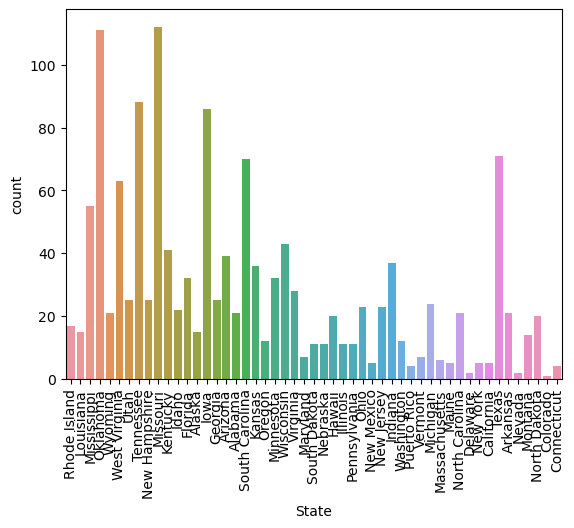

In [62]:
sns.countplot(x= anti_web_df['State'], data = anti_web_df)
plt.xticks(rotation = 90)
plt.show()

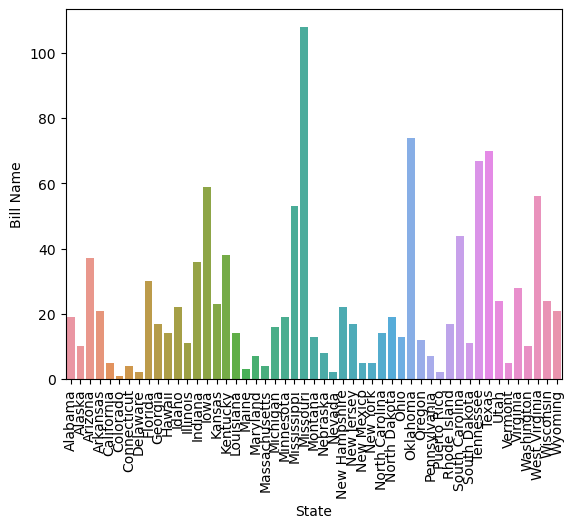

In [65]:
sns.barplot(x= excluding_duplicates['State'], y=excluding_duplicates['Bill Name'])
plt.xticks(rotation = 90)
plt.show()

108    1
Name: Bill Name, dtype: int64

In [41]:
anti_web_df =  combined_web[~combined_web['Issues'].astype(str).str.contains('LGBTQ Equality Bills')]